In [33]:
# import libraries
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

In [43]:
# Download the data
url = f"https://downloads.psl.noaa.gov/Datasets/ghcncams/air.mon.mean.nc"
savename = url.split("/")[-1]
urllib.request.urlretrieve(url, savename)

('air.mon.mean.nc', <http.client.HTTPMessage at 0x7e2b1ab5b410>)

In [47]:
# Open the air temprature Dataset
ds = xr.open_dataset(savename)

# Extract the air temprature DataArray
ta = ds["air"]
# Convert units to Celsius, which is asked for in future problems
ta = ta - 273.15

In [48]:
# Now let's filter to only get 1990-2010
filtered_ta = ta.sel(time=slice("1990-01-01", "2010-12-01"))
filtered_ta #Print so I made sure I did this right

<xarray.DataArray 'air' (time: 252, lat: 360, lon: 720)> Size: 261MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01

In [49]:
# Get unweighted mean
air_unweighted = filtered_ta.mean(("lon", "lat"))

# Get weights
weights = np.cos(np.deg2rad(filtered_ta.lat))
weights.name = "weights"
# Apply weights
air_weighted = filtered_ta.weighted(weights)
# Get mean
weighted_mean = air_weighted.mean(("lon", "lat"))
weighted_mean # Print to make sure I did it right

<xarray.DataArray 'air' (time: 252)> Size: 1kB
array([ 5.970686 ,  7.1851516, 11.107106 , 13.944129 , 16.876314 ,
       19.262566 , 20.154182 , 19.883478 , 17.70617  , 14.621669 ,
       10.473317 ,  7.185212 ,  6.0583477,  7.328166 ,  9.931398 ,
       13.914751 , 16.808928 , 19.372763 , 20.370842 , 19.871655 ,
       17.966867 , 14.543257 , 10.191036 ,  6.8397446,  6.3489223,
        7.398067 , 10.179305 , 13.386293 , 16.601274 , 18.789707 ,
       19.62703  , 19.372862 , 17.243198 , 14.006326 ,  9.57056  ,
        7.0351944,  6.0854287,  7.2382746, 10.161078 , 13.47436  ,
       16.750237 , 18.978046 , 20.12994  , 19.640676 , 17.404118 ,
       14.31236  ,  9.406825 ,  7.072537 ,  5.875866 ,  6.321281 ,
       10.092463 , 13.823732 , 16.946222 , 19.266865 , 20.20539  ,
       19.782673 , 17.940222 , 14.744226 , 10.460703 ,  7.20223  ,
        6.5737505,  8.196803 , 10.25244  , 13.885322 , 16.884605 ,
       19.430738 , 20.38205  , 20.29327  , 18.16326  , 14.959263 ,
       10.552278 ,  7.026081 ,  5.7563195,  7.3648853,  9.752321 ,
       13.301132 , 16.92881  , 19.060522 , 20.26768  , 19.776274 ,
       17.613556 , 14.295063 , 10.174981 ,  7.2361293,  6.07345  ,
        7.3524623, 10.303459 , 13.753403 , 16.773785 , 19.322744 ,
       20.374537 , 20.048609 , 18.16118  , 14.877888 , 10.389222 ,
        7.2806315,  6.2659326,  8.291188 , 10.473856 , 14.458402 ,
...
        7.126129 ,  6.8324533,  7.4964733, 10.329161 , 14.026824 ,
       17.418669 , 19.511507 , 20.694586 , 20.43779  , 18.374334 ,
       15.329326 , 10.679261 ,  8.046484 ,  6.423319 ,  7.9591885,
       10.7615   , 14.073646 , 16.877676 , 19.297827 , 20.355623 ,
       20.006416 , 18.151796 , 15.02504  , 11.150092 ,  7.1423373,
        6.6342587,  7.4697046, 10.803388 , 14.552777 , 17.407505 ,
       19.835712 , 20.859442 , 20.330832 , 18.625946 , 15.403803 ,
       11.25102  ,  7.7204   ,  6.229127 ,  7.8682094, 10.64899  ,
       13.963927 , 17.11784  , 19.798447 , 20.842587 , 20.394089 ,
       18.385849 , 15.355191 , 10.745607 ,  8.174555 ,  7.4614925,
        7.867252 , 10.760866 , 14.693708 , 17.389874 , 19.481133 ,
       20.656975 , 20.389214 , 18.45242  , 15.245101 , 10.803963 ,
        7.622045 ,  5.7961016,  7.2152967, 11.211013 , 13.980672 ,
       17.158094 , 19.520874 , 20.753138 , 20.288109 , 18.173008 ,
       15.323854 , 11.091212 ,  7.433387 ,  6.578271 ,  7.698312 ,
       10.404174 , 14.314263 , 17.140596 , 19.52322  , 20.588194 ,
       20.437689 , 18.676985 , 15.022351 , 10.81508  ,  7.332527 ,
        6.5122404,  7.8972764, 11.068981 , 14.657537 , 17.653004 ,
       19.900658 , 21.04962  , 20.574251 , 18.395267 , 15.295528 ,
       11.433773 ,  7.3292527], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01

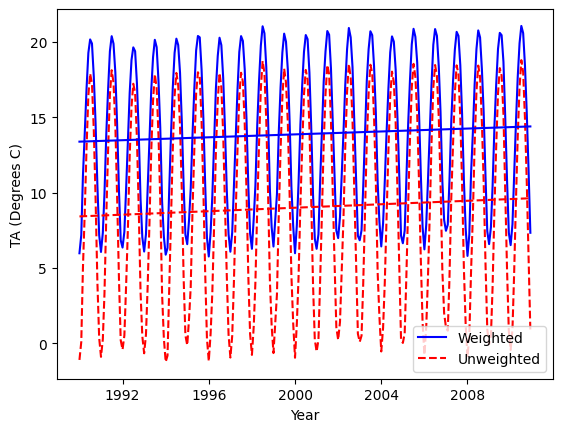

In [58]:
# Problem 2
# Plot data
weighted_mean.plot(label="Weighted", color='blue', linestyle='-')
air_unweighted.plot(label="Unweighted", color='red', linestyle='--')

# Set axis labels
plt.xlabel('Year')
plt.ylabel('TA (Degrees C)')
plt.legend() # Get legend

# FROM YOUR NOTES I TOOK THIS FUNCTION, but had to adapt since it was throwing errors
# define a function to compute a linear trend of a time series (we use numpy.polyfit())
def linear_trend(y):
    x = np.arange(len(y)) # From my understanding, this assumes linear steps in x (which holds in this case)
    pf = np.polyfit(x, y, 1)
    trend = np.polyval(pf, x)
    return trend
# Use data to compute weighted trend for each time step
weighted_trend = linear_trend(weighted_mean.values)
# Use unweighted data to computed unweighted trend for each time step
unweighted_trend = linear_trend(air_unweighted.values)
# Plot each line using same colors as above
plt.plot(weighted_mean['time'], weighted_trend, label="Weighted Trend Line", color='blue', linestyle='-')
plt.plot(air_unweighted['time'], unweighted_trend, label="Unweighted Trend Line", color='red', linestyle='--')

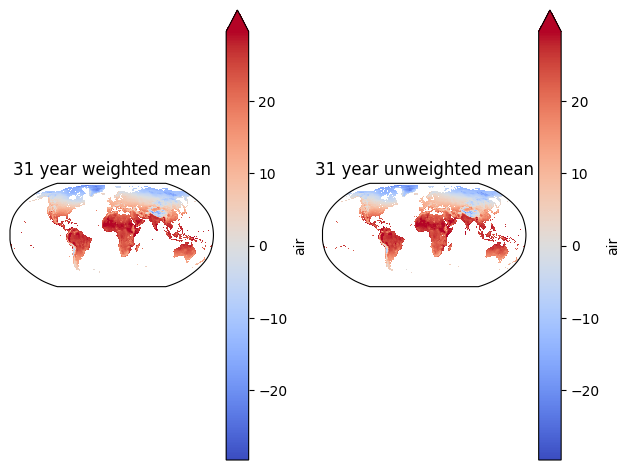

In [64]:
# Step 3
#!pip install cartopy
# Import needed packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# Make two subplots, using Robinson projection
fig, axes = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': ccrs.Robinson()})
weighted_ax = axes[0] # Create variable name for axes[0] plot for weighted
unweighted_ax = axes[1] # Create variable name for axes[1] plot for unweighted

# Take 31-year average of weighted and unweighted (i.e. using time as dimension rather than long or latitude)
# Get weights
weights = np.cos(np.deg2rad(filtered_ta.lat))
weights.name = "weights"
# Apply weights
air_weighted = filtered_ta.weighted(weights)
# Get weighted mean by time
weighted_mean_31 = air_weighted.mean(dim='time')
# Get unweighted mean by time
unweighted_mean_31 = filtered_ta.mean(dim='time')

# Make weighted robinson plot
p1 = weighted_mean_31.plot(ax=weighted_ax,
                           transform=ccrs.PlateCarree(), # Copied this code from your git
                           cmap='coolwarm',
                           robust=True)
weighted_ax.set_title('31 year weighted mean')
# Make unweighted robinson plot
p2 = unweighted_mean_31.plot(ax=unweighted_ax,
                              transform=ccrs.PlateCarree(),
                              cmap='coolwarm',  # Copied this code from your git
                              robust=True)
unweighted_ax.set_title('31 year unweighted mean')
plt.tight_layout()